Model_CNN

In [99]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Charger Vos données prétraitées
# X = np.load("X_preprocessed.npy")
# y = np.load("y_labels.npy")

# Convertir les labels en indices numériques
label_map = {label: idx for idx, label in enumerate(np.unique(y))}
y = np.array([label_map[label] for label in y])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajouter une dimension pour les canaux (images en niveaux de gris, donc 1 canal)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Construire le modèle CNN
model = models.Sequential()

# 1ère couche convolutionnelle avec 32 filtres, taille de filtre (3, 3), activation ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))  # Pooling pour réduire la taille de l'image
model.add(layers.Dropout(0.3))  # Dropout de 30% après la première couche

# 2ème couche convolutionnelle avec 64 filtres, taille de filtre (3, 3), activation ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))  # Dropout de 30% après la deuxième couche

# Aplatir les résultats de la couche précédente pour les passer à des couches denses
model.add(layers.Flatten())

# Couche dense avec 128 neurones et activation ReLU
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout de 50% après la couche dense

# Couche de sortie avec softmax (adaptée pour la classification multi-classes)
model.add(layers.Dense(len(label_map), activation='softmax'))

# Compiler le modèle avec un taux d'apprentissage initial de 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Pour la classification multi-classes
              metrics=['accuracy'])

# Définir le callback ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', 
                                 factor=0.25, 
                                 patience=8, 
                                 verbose=1, 
                                 min_lr=1e-6)

# Définir le callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=8, 
                               verbose=1, 
                               restore_best_weights=True)

# Entraîner le modèle avec réduction du taux d'apprentissage et early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[lr_scheduler, early_stopping])


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.1535 - loss: 2.8423 - val_accuracy: 0.1707 - val_loss: 2.0789 - learning_rate: 0.0010
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.1832 - loss: 2.0697 - val_accuracy: 0.2927 - val_loss: 2.0662 - learning_rate: 0.0010
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.1570 - loss: 2.0574 - val_accuracy: 0.4634 - val_loss: 2.0217 - learning_rate: 0.0010
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.2474 - loss: 2.0007 - val_accuracy: 0.5976 - val_loss: 1.9219 - learning_rate: 0.0010
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.3812 - loss: 1.8416 - val_accuracy: 0.6463 - val_loss: 1.5743 - learning_rate: 0.0010
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.4986 - loss: 1.5215 - val_accuracy: 0.7317 - val_loss: 1.1317 - learning_rate: 0.0010
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.6080 - loss: 1.

In [124]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0216
Test accuracy: 1.0


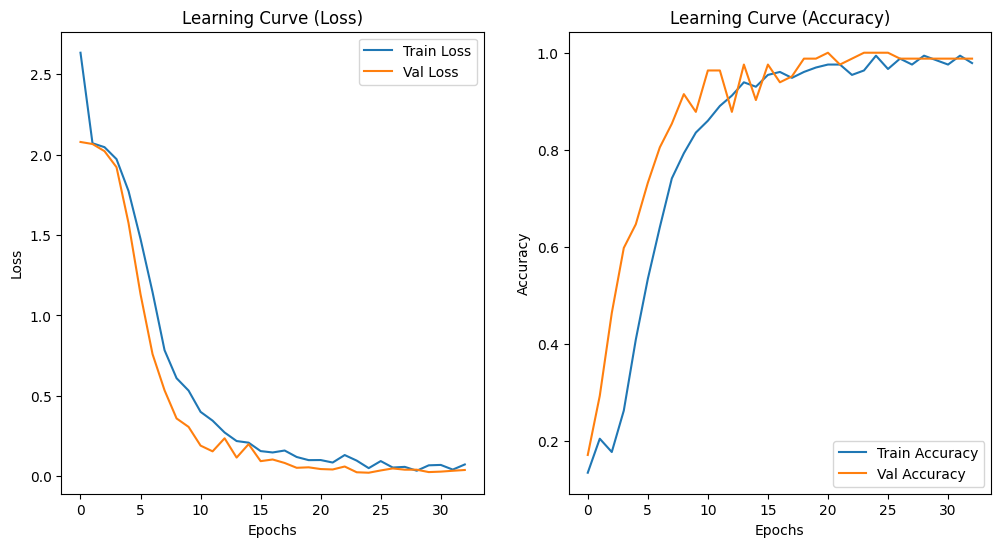

In [100]:
import matplotlib.pyplot as plt 
def plot_learning_curves(history):
    # Courbe de perte
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Learning Curve (Loss)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Courbe de précision
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Learning Curve (Accuracy)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Appeler la fonction pour afficher les courbes
plot_learning_curves(history)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


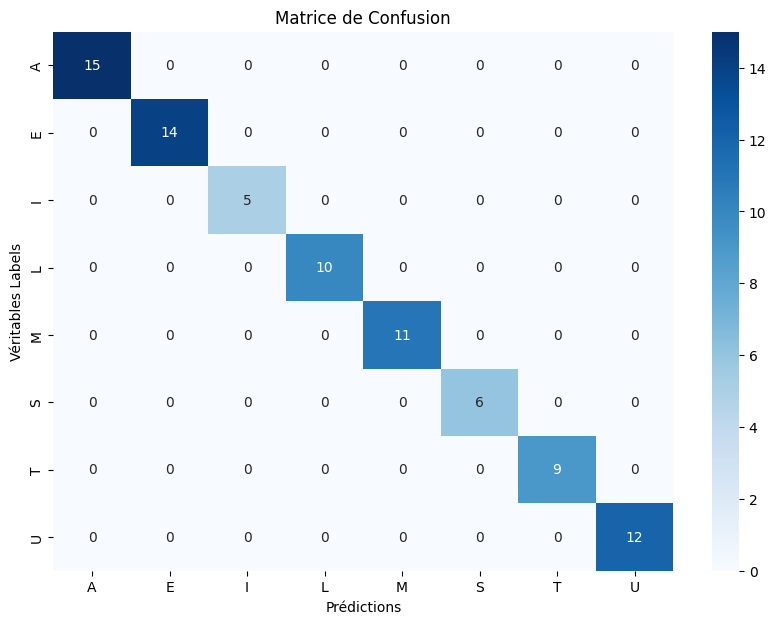

Rapport de Classification :
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        15
           E       1.00      1.00      1.00        14
           I       1.00      1.00      1.00         5
           L       1.00      1.00      1.00        10
           M       1.00      1.00      1.00        11
           S       1.00      1.00      1.00         6
           T       1.00      1.00      1.00         9
           U       1.00      1.00      1.00        12

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [125]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Récupérer les indices des classes prédites

# Générer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables Labels')
plt.show()

# Générer le rapport de classification
report = classification_report(y_test, y_pred_classes, target_names=label_map.keys())
print("Rapport de Classification :\n", report)

In [119]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [123]:
from keras.utils import plot_model

plot_model(model=model, show_shapes=True, dpi=54, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [112]:

# Sauvegarder le modèle
model.save('hand_sign_language_model.h5')